In [41]:
import src
import os
import numpy as np
import sys
import re
import math
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(0, 'C:/Users/pkicsiny/Desktop/TUM/3/ADL4CV/ADL4CV_project/models')

In [42]:
os.listdir(sys.path[0])

['lstm_2-1',
 'sgan_2-1',
 'sgan_2-1_iw',
 'sgan_2-1_w',
 'tgan_2-1',
 'tgan_2-1_iw',
 'unet_2-1']

In [147]:
which_scores = "_intensity_scores"

In [159]:
scores = {}
for model in os.listdir(sys.path[0]):
    try:
        scores[model] = np.load(sys.path[0]+"/"+model+"/"+model+which_scores+".npy")
    except:
        pass

In [160]:
scores.keys()

dict_keys(['sgan_2-1', 'sgan_2-1_iw', 'sgan_2-1_w', 'tgan_2-1', 'tgan_2-1_iw'])

In [176]:
0.808048-0.771115

0.036932999999999994

In [175]:
result["sgan_2-1"]

,corr_to_input,corr_to_truth,csi,far,pod
pred_1,0.808048,0.771115,0.554744,0.238996,0.676019
pred_2,0.640716,0.597691,0.388893,0.283160,0.473832
pred_3,0.426130,0.400428,0.281034,0.334266,0.343687
pred_4,0.305120,0.287461,0.206435,0.387740,0.255363
pred_5,0.257716,0.238539,0.158926,0.435509,0.200368
pred_6,0.238984,0.209422,0.128865,0.467922,0.166895
pred_7,0.227130,0.184954,0.108817,0.494321,0.144752
pred_8,0.214985,0.164762,0.095079,0.528966,0.129724
pred_9,0.205832,0.155788,0.086816,0.536267,0.120584
pred_10,0.201061,0.151381,0.080967,0.537773,0.114130


In [162]:
result = {}
for model in scores.keys():
    result[model] = pd.DataFrame(
        data=[pd.DataFrame(scores[model].item()[key]).mean() for key in scores[model].item().keys()],
        index=scores[model].item().keys())#.groupby(['corr_to_input', 'corr_to_truth'])

In [163]:
n = 5

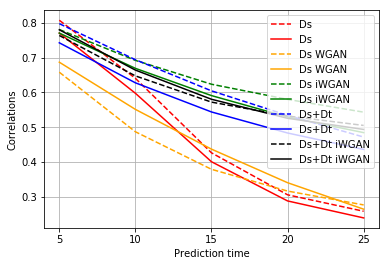

In [167]:
fig, ax1 = plt.subplots(1,1)
ax1.plot(result["sgan_2-1"].reset_index()["corr_to_input"][:n], label="Ds", linestyle='--',c="r")
ax1.plot(result["sgan_2-1"].reset_index()["corr_to_truth"][:n], label="Ds", c="red")

ax1.plot(result["sgan_2-1_w"].reset_index()["corr_to_input"][:n], label="Ds WGAN", linestyle='--',c="orange")
ax1.plot(result["sgan_2-1_w"].reset_index()["corr_to_truth"][:n], label="Ds WGAN", c="orange")

ax1.plot(result["sgan_2-1_iw"].reset_index()["corr_to_input"][:n], label="Ds iWGAN", linestyle='--',c="g")
ax1.plot(result["sgan_2-1_iw"].reset_index()["corr_to_truth"][:n], label="Ds iWGAN", c="green")

ax1.plot(result["tgan_2-1"].reset_index()["corr_to_input"][:n], label="Ds+Dt", linestyle='--',c="b")
ax1.plot(result["tgan_2-1"].reset_index()["corr_to_truth"][:n], label="Ds+Dt", c="blue")

ax1.plot(result["tgan_2-1_iw"].reset_index()["corr_to_input"][:n], label="Ds+Dt iWGAN", linestyle='--',c="k")
ax1.plot(result["tgan_2-1_iw"].reset_index()["corr_to_truth"][:n], label="Ds+Dt iWGAN", c="black")
ax1.grid()
plt.xticks(np.arange(0, n, 1))
ax1.set_xticklabels(list(map(str,5*np.arange(0,len(result['sgan_2-1']))+5)))
ax1.set_xlabel("Prediction time")
ax1.set_ylabel("Correlations")
ax1.legend(loc="upper right")
plt.savefig("input_intensity_corrs")

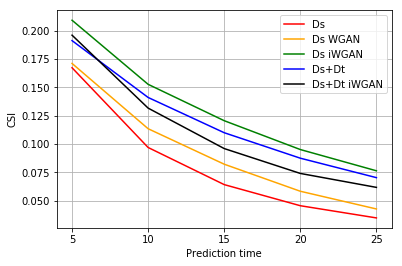

In [133]:
fig, ax2 = plt.subplots(1,1)
ax2.plot(result["sgan_2-1"].reset_index()["csi"][:n], label="Ds",c="r")
ax2.plot(result["sgan_2-1_w"].reset_index()["csi"][:n], label="Ds WGAN",c="orange")
ax2.plot(result["sgan_2-1_iw"].reset_index()["csi"][:n], label="Ds iWGAN",c="g")
ax2.plot(result["tgan_2-1"].reset_index()["csi"][:n], label="Ds+Dt",c="b")
ax2.plot(result["tgan_2-1_iw"].reset_index()["csi"][:n], label="Ds+Dt iWGAN",c="k")

ax2.set_xlabel("Prediction time")
ax2.set_ylabel("CSI")
ax2.grid()
plt.xticks(np.arange(0, n, 1))
ax2.set_xticklabels(list(map(str,5*np.arange(0,len(result['sgan_2-1']))+5)))
ax2.legend()
plt.savefig("csi")

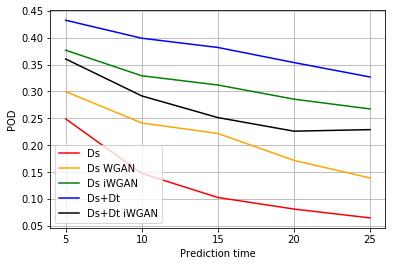

In [134]:
fig, ax2 = plt.subplots(1,1)
ax2.plot(result["sgan_2-1"].reset_index()["pod"][:n], label="Ds",c="r")
ax2.plot(result["sgan_2-1_w"].reset_index()["pod"][:n], label="Ds WGAN",c="orange")
ax2.plot(result["sgan_2-1_iw"].reset_index()["pod"][:n], label="Ds iWGAN",c="g")
ax2.plot(result["tgan_2-1"].reset_index()["pod"][:n], label="Ds+Dt",c="b")
ax2.plot(result["tgan_2-1_iw"].reset_index()["pod"][:n], label="Ds+Dt iWGAN",c="k")

ax2.set_xlabel("Prediction time")
ax2.set_ylabel("POD")
ax2.grid()
plt.xticks(np.arange(0, n, 1))
ax2.set_xticklabels(list(map(str,5*np.arange(0,len(result['sgan_2-1']))+5)))
ax2.legend()
plt.savefig("pod")

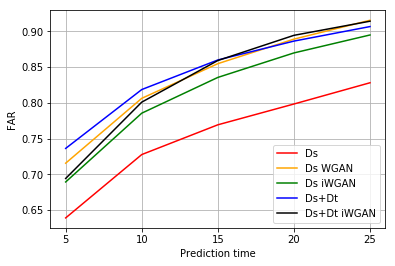

In [135]:
fig, ax2 = plt.subplots(1,1)
ax2.plot(result["sgan_2-1"].reset_index()["far"][:n], label="Ds",c="r")
ax2.plot(result["sgan_2-1_w"].reset_index()["far"][:n], label="Ds WGAN",c="orange")
ax2.plot(result["sgan_2-1_iw"].reset_index()["far"][:n], label="Ds iWGAN",c="g")
ax2.plot(result["tgan_2-1"].reset_index()["far"][:n], label="Ds+Dt",c="b")
ax2.plot(result["tgan_2-1_iw"].reset_index()["far"][:n], label="Ds+Dt iWGAN",c="k")

ax2.set_xlabel("Prediction time")
ax2.set_ylabel("FAR")
ax2.grid()
plt.xticks(np.arange(0, n, 1))
ax2.set_xticklabels(list(map(str,5*np.arange(0,len(result['sgan_2-1']))+5)))
ax2.legend()
plt.savefig("far")